In [1]:
import json
import pandas as pd
from pathlib import Path

In [2]:
data_paths = list(Path("./evaluations").iterdir())
data_paths

[PosixPath('evaluations/i_22_hs_False_llm_llama-3.2-11B-vision-instruct_topk_5_cs_128_prep_SentenceSplitter.json'),
 PosixPath('evaluations/i_16_hs_True_llm_gemini-1.5-pro_topk_5_cs_256_prep_SentenceSplitter.json'),
 PosixPath('evaluations/i_21_hs_False_llm_llama-3.2-11B-vision-instruct_topk_5_cs_128_prep_TokenTextSplitter.json'),
 PosixPath('evaluations/i_26_hs_False_llm_gemini-1.5-pro_topk_3_cs_128_prep_SentenceSplitter.json'),
 PosixPath('evaluations/i_10_hs_True_llm_gemini-1.5-pro_topk_3_cs_128_prep_SentenceSplitter.json'),
 PosixPath('evaluations/i_9_hs_True_llm_gemini-1.5-pro_topk_3_cs_128_prep_TokenTextSplitter.json'),
 PosixPath('evaluations/i_24_hs_False_llm_llama-3.2-11B-vision-instruct_topk_5_cs_256_prep_SentenceSplitter.json'),
 PosixPath('evaluations/i_20_hs_False_llm_llama-3.2-11B-vision-instruct_topk_3_cs_256_prep_SentenceSplitter.json'),
 PosixPath('evaluations/i_14_hs_True_llm_gemini-1.5-pro_topk_5_cs_128_prep_SentenceSplitter.json'),
 PosixPath('evaluations/i_28_hs_Fa

In [3]:
results = []
for setup in data_paths:
    setup_name = setup.stem

    data = json.loads(open(setup).read())
    for item in data:
        results.append([
            setup_name, 
            item['answer_relevancy']['score'], 
            item['faithfulness']['score'], 
            item['contextual_relevancy']['score'], 
            item['answer_relevancy']['reason'], 
            item['faithfulness']['reason'], 
            item['contextual_relevancy']['reason']
        ])

In [4]:
df = pd.DataFrame(results, columns=['setup', 'answer_relevance', 'faithfulness', 'contextual_relevance', 'answer_relevance_reason', 'faithfulness_reason', 'contextual_relevance_reason'])
df

,setup,answer_relevance,faithfulness,contextual_relevance,answer_relevance_reason,faithfulness_reason,contextual_relevance_reason
0,i_22_hs_False_llm_llama-3.2-11B-vision-instruc...,0.0,1.0,0.080000,The score is 0.00 because the output fails to ...,The score is 1.00 because there are no contrad...,The score is 0.08 because the retrieval contex...
1,i_22_hs_False_llm_llama-3.2-11B-vision-instruc...,1.0,1.0,0.041667,The score is 1.00 because the response directl...,The score is 1.00 because there are no contrad...,The score is 0.04 because the retrieval contex...
2,i_22_hs_False_llm_llama-3.2-11B-vision-instruc...,1.0,0.0,0.045455,The score is 1.00 because the response directl...,The score is 0.00 because the actual output cl...,The score is 0.05 because the retrieval contex...
3,i_22_hs_False_llm_llama-3.2-11B-vision-instruc...,1.0,1.0,0.105263,The score is 1.00 because the response directl...,The score is 1.00 because there are no contrad...,"The score is 0.11 because, despite the retriev..."
4,i_22_hs_False_llm_llama-3.2-11B-vision-instruc...,0.0,1.0,0.000000,The score is 0.00 because the statement indica...,The score is 1.00 because there are no contrad...,The score is 0.00 because the retrieval contex...
...,...,...,...,...,...,...,...
1595,i_18_hs_False_llm_llama-3.2-11B-vision-instruc...,1.0,1.0,0.105263,The score is 1.00 because there are no irrelev...,The score is 1.00 because there are no contrad...,The score is 0.11 because while the relevant s...
1596,i_18_hs_False_llm_llama-3.2-11B-vision-instruc...,0.0,1.0,0.000000,The score is 0.00 because it lacks any relevan...,The score is 1.00 because there are no contrad...,The score is 0.00 because the retrieval contex...
1597,i_18_hs_False_llm_llama-3.2-11B-vision-instruc...,0.0,1.0,0.263158,The score is 0.00 because the answer fails ent...,The score is 1.00 because there are no contrad...,The score is 0.26 because while statements in ...
1598,i_18_hs_False_llm_llama-3.2-11B-vision-instruc...,1.0,1.0,0.500000,The score is 1.00 because there are no irrelev...,The score is 1.00 because there are no contrad...,The score is 0.50 because while there are rele...


In [25]:
result = df.iloc[:, :4].groupby('setup').mean().sort_values('answer_relevance', ascending=False)

In [29]:
import numpy as np

result['answer_relevance'] = np.round(result['answer_relevance'], 3)
result['faithfulness'] = np.round(result['faithfulness'], 3)
result['contextual_relevance'] = np.round(result['contextual_relevance'], 3)
result

,answer_relevance,faithfulness,contextual_relevance
setup,,,
i_15_hs_True_llm_gemini-1.5-pro_topk_5_cs_256_prep_TokenTextSplitter,0.944,0.925,0.130
i_11_hs_True_llm_gemini-1.5-pro_topk_3_cs_256_prep_TokenTextSplitter,0.942,0.873,0.171
i_16_hs_True_llm_gemini-1.5-pro_topk_5_cs_256_prep_SentenceSplitter,0.917,0.860,0.132
i_4_hs_True_llm_llama-3.2-11B-vision-instruct_topk_3_cs_256_prep_SentenceSplitter,0.911,0.910,0.198
i_7_hs_True_llm_llama-3.2-11B-vision-instruct_topk_5_cs_256_prep_TokenTextSplitter,0.903,0.914,0.140
i_8_hs_True_llm_llama-3.2-11B-vision-instruct_topk_5_cs_256_prep_SentenceSplitter,0.897,0.942,0.140
i_24_hs_False_llm_llama-3.2-11B-vision-instruct_topk_5_cs_256_prep_SentenceSplitter,0.892,0.864,0.132
i_5_hs_True_llm_llama-3.2-11B-vision-instruct_topk_5_cs_128_prep_TokenTextSplitter,0.890,0.785,0.165
i_10_hs_True_llm_gemini-1.5-pro_topk_3_cs_128_prep_SentenceSplitter,0.885,0.924,0.215


In [22]:
df.to_csv('evaluations/results.csv', index=False)

/var/folders/2w/1bywll1n6yd6qk1s77ht86vm0000gn/T/ipykernel_97632/2837838157.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_1['model'] = 'gemini-1.5-pro'
/var/folders/2w/1bywll1n6yd6qk1s77ht86vm0000gn/T/ipykernel_97632/2837838157.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_2['model'] = 'llama-3.2-11B-vision-instruct'


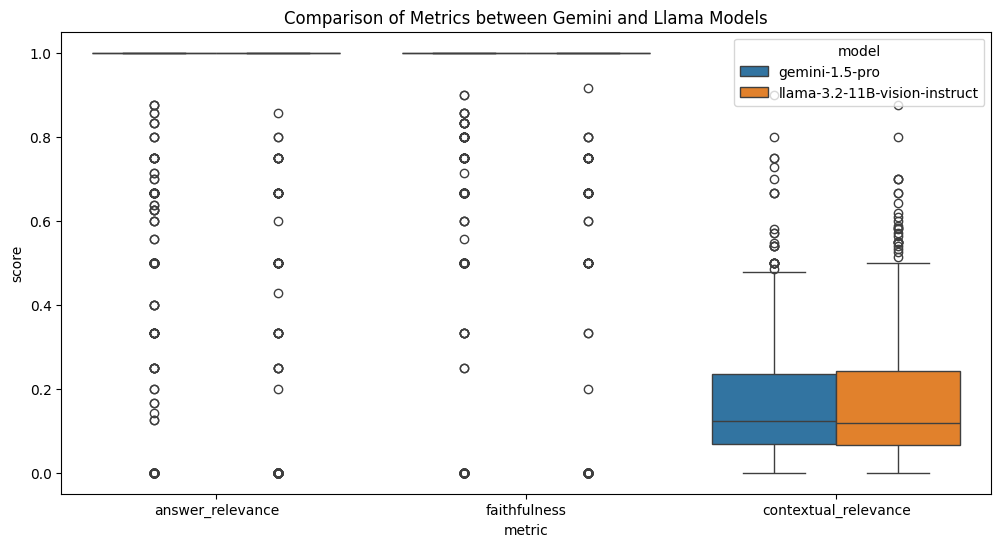

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Filter the DataFrame for the two setups, using more robust matching
# df_subset_1 = df[df['setup'].str.contains('gemini-1.5-pro', case=False, na=False)]
# df_subset_2 = df[df['setup'].str.contains('llama-3.2-11B-vision-instruct', case=False, na=False)]

# # Add a 'model' column to each subset
# df_subset_1['model'] = 'gemini-1.5-pro'
# df_subset_2['model'] = 'llama-3.2-11B-vision-instruct'

# # Concatenate the subsets
# df_combined = pd.concat([df_subset_1, df_subset_2])

# # Melt the DataFrame for Seaborn
# df_melted = pd.melt(df_combined, id_vars=['model'], value_vars=['answer_relevance', 'faithfulness', 'contextual_relevance'], var_name='metric', value_name='score')

# # Create the box plot
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='metric', y='score', hue='model', data=df_melted)
# plt.title('Comparison of Metrics between Gemini and Llama Models')
# plt.show()

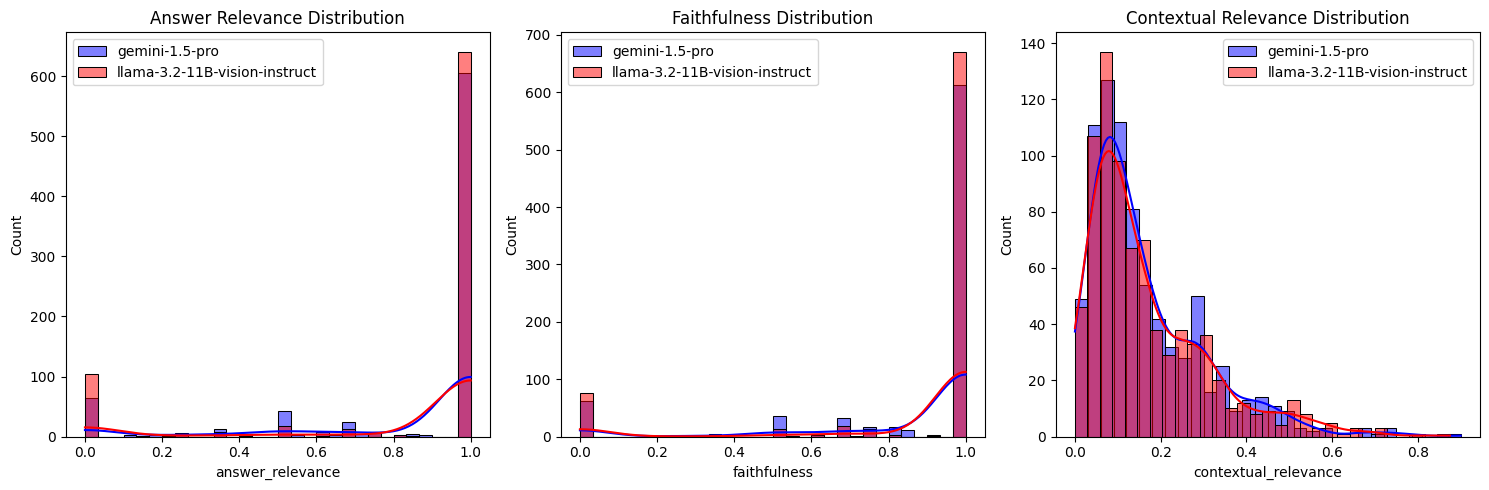

(answer_relevance        0.844972
 faithfulness            0.866852
 contextual_relevance    0.165587
 dtype: float64,
 answer_relevance        0.838149
 faithfulness            0.880792
 contextual_relevance    0.167245
 dtype: float64)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

filter_a = "gemini-1.5-pro"
filter_b = "llama-3.2-11B-vision-instruct"
# filter_a = "hs_True"
# filter_b = "hs_False"
# filter_a = "topk_5"
# filter_b = "topk_3"
# filter_a = "cs_256"
# filter_b = "cs_128"
# filter_a = "TokenTextSplitter"
# filter_b = "SentenceSplitter"

df_subset_1 = df[df['setup'].str.contains(filter_a, case=False, na=False)]
df_subset_2 = df[df['setup'].str.contains(filter_b, case=False, na=False)]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_subset_1["answer_relevance"], bins=30, kde=True, color='blue', label=filter_a, alpha=0.5)
sns.histplot(df_subset_2["answer_relevance"], bins=30, kde=True, color='red', label=filter_b, alpha=0.5)
plt.title('Answer Relevance Distribution')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(df_subset_1["faithfulness"], bins=30, kde=True, color='blue', label=filter_a, alpha=0.5)
sns.histplot(df_subset_2["faithfulness"], bins=30, kde=True, color='red', label=filter_b, alpha=0.5)
plt.title('Faithfulness Distribution')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(df_subset_1["contextual_relevance"], bins=30, kde=True, color='blue', label=filter_a, alpha=0.5)
sns.histplot(df_subset_2["contextual_relevance"], bins=30, kde=True, color='red', label=filter_b, alpha=0.5)
plt.title('Contextual Relevance Distribution')
plt.legend()

plt.tight_layout()
plt.show()

df_subset_1.iloc[:, 1:4].mean(), df_subset_2.iloc[:, 1:4].mean()